## learning-AI101 : glass classification
### 유리 데이터를 KNN, SVM, logistic regression, decision tree, random forest, K-means로 classification

<br>

- **임규연 (lky473736)**
- 2024.07.27. ~ 2024.07.29.에 문서 작성
- **dataset** : https://archive.ics.uci.edu/dataset/42/glass+identification
- **kaggle** : https://www.kaggle.com/datasets/uciml/glass
- **data abstract** : Vina conducted a comparison test of her rule-based system, BEAGLE, the nearest-neighbor algorithm, and discriminant analysis.  BEAGLE is a product available through VRS Consulting, Inc.; 4676 Admiralty Way, Suite 206; Marina Del Ray, CA 90292 (213) 827-7890 and FAX: -3189. In determining whether the glass was a type of "float" glass or not. The study of classification of types of glass was motivated by criminological investigation.  At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!
- **memo** : <혼자 공부하는 머신러닝&딥러닝> 1회독을 하였고, 본 문서를 작성하면서 전체적으로 책에 있는 내용을 다시 따라하고 복습하려고 한다. 따라서 스스로 내 자신을 가르친다고 생각하고 설명을 길게 작성하면서 classification을 진행한다.

------

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

-------

### 1. 데이터 EDA (탐색적 데이터 분석)

classification을 진행하기 전, 데이터 구조를 파악한다.

- **데이터 구조 파악 및 EDA**
    - 각 feature가 의미하는 바를 분석, 결측치 파악 후 어떻게 classification을 진행하는 것이 탁월할 지 파악
    - 각 feature에 대한 사분위수, mean, max, min, median, corr
    - target의 도수를 bar plot 시각화
    - seaborn을 통한 corr 상관관계 및 histplot 시각화
    - 각 attribute에 대한 box plot 시각화

#### 1-1) 파일 열기
현재 ./data/glass에 데이터를 다운로드하였고, 데이터 파일은 아래와 같다.

```sh
alphastation:learning-ai101 alphastation$ ls -lha ./report/data/glass
total 48
drwx------@  6 alphastation  staff   192B  7 27 14:33 .
drwxr-xr-x  10 alphastation  staff   320B  7 27 14:34 ..
-rwx------@  1 alphastation  staff   139B  5 22  2023 Index
-rwx------@  1 alphastation  staff    12K  5 22  2023 glass.data
-rwx------@  1 alphastation  staff   3.4K  5 22  2023 glass.names
-rwx------@  1 alphastation  staff   780B  5 22  2023 glass.tag
```

파일을 차례대로 설명하자면, 
- Index : 말 그대로, 데이터 파일의 index를 붙여주는 쉘 스크립트 프로그램 같다.
- glass.data : 실질적인 data의 records가 들어있다.
- glass.names : glass data 분석을 어떻게 하면 좋을지 가이드라인이 적혀져 있으며, 각 feature의 분포를 설명하고 있다.
- glass.tag : glass data의 attribute 이름이 적혀있다.

glass.tag에 적혀져 있는 각 attribute는 아래와 같다.
```txt
   1. Id number: 1 to 214
   2. RI: refractive index
   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as 
                  are attributes 4-10)
   4. Mg: Magnesium
   5. Al: Aluminum
   6. Si: Silicon
   7. K: Potassium
   8. Ca: Calcium
   9. Ba: Barium
  10. Fe: Iron
  11. Type of glass: (class attribute)
      -- 1 building_windows_float_processed
      -- 2 building_windows_non_float_processed
      -- 3 vehicle_windows_float_processed
      -- 4 vehicle_windows_non_float_processed (none in this database)
      -- 5 containers
      -- 6 tableware
      -- 7 headlamps
```

따라서, 데이터프레임을 만들어 데이터 분석을 하기 위해, **glass.data의 확장자를 .csv로 변경한 후, 파일을 열어 dataframe으로 변환 후, head와 info를 확인**한다.

In [6]:
# 일단은, glass.data를 열어 30줄 정도 출력한다.

f = open('./data/glass/glass.data', 'r')

for row in range (30) :
    line = f.readline()
    print (line)
    
f.close ()

# 차례대로 Id, RI, Na, Mg, Al, Si, K, Ca, Ba, Fe, target of glass

1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1

2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1

3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1

4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1

5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1

6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1

7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1

8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1

9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1

10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1

11,1.51571,12.72,3.46,1.56,73.20,0.67,8.09,0.00,0.24,1

12,1.51763,12.80,3.66,1.27,73.01,0.60,8.56,0.00,0.00,1

13,1.51589,12.88,3.43,1.40,73.28,0.69,8.05,0.00,0.24,1

14,1.51748,12.86,3.56,1.27,73.21,0.54,8.38,0.00,0.17,1

15,1.51763,12.61,3.59,1.31,73.29,0.58,8.50,0.00,0.00,1

16,1.51761,12.81,3.54,1.23,73.24,0.58,8.39,0.00,0.00,1

17,1.51784,12.68,3.67,1.16,73.11,0.61,8.70,0.00,0.00,1

18,1.52196,14.36,3.85,0.89,71.36,0.15,9.15,0.00,0.00,1

1

위를 확인해보니, 본 파일엔 header가 첫 행에 지정되어 있지 않다. 따라서 추후에 dataframe으로 변환 시 header를 glass.tag에 적혀져 있는 attribute로 두어야 할 것이다.

In [7]:
# 파일 확장자 변경

import os # os 라이브러리로 파일 확장자 변경할 예정

os.rename('./data/glass/glass.data', './data/glass/glass.csv')

In [8]:
# dataframe으로 읽어들이기 (변환) 및 header 지정

header = ['id', 'RI', 'Na', 'Mg', 
          'Al', 'Si', 'K', 'Ca', 
          'Ba', 'Fe', 'target']
df = pd.read_csv('./data/glass/glass.csv', names=header)

In [9]:
# head로 5개 records 읽기

df.head()

,id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,target
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [10]:
# info로 data의 기본 정보 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  target  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


#### 1-2) 기초 통계량 분석 및 classification 전략 도출

In [11]:
# df의 행 갯수, 열 갯수, 각 열 명 파악
df.shape, df.columns

((214, 11),
 Index(['id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'target'], dtype='object'))

In [12]:
# describe (데이터 타입은 info()로 보았으니 pass)

df.describe()

,id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,target
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


id와 target을 제외한 나머지 attribute만 분석하자면 아래와 같다.

- 일단은, 현재 모든 records의 count 수가 214개로 같은 것을 보아 결측치는 확인되지 않는다.
- 각자 범위(max - min)가 매우 달라 추후에 logistic regression이나 SVM을 위하여 standard scaling이 필요해 보인다. 
    - decision tree는 스케일링이 필요 없다.

classification 전략을 세우자면 아래와 같다.

- 물론 추후에 heatmap을 그려보아야 알겠지만, 상관계수가 낮은 feature를 학습에 제외시켜 curse of dimensionality를 막을 수도 있을 것이다. 심한 overfitting일 시 추후에 고려해보자.
- https://archive.ics.uci.edu/dataset/42/glass+identification 의 "baseline model performance"에서도 나와있듯이, 현재 시도하고자 하는 모델 중 random forest가 가장 효율성이 좋아서 실제로 그러한 지 확인해보도록 하자. 
- 위의 것을 하기 위해선, 맨 마지막에 각 모델 별로 score를 비교하는 plot을 이용한 visualization이 필요해 보인다.


#### 1-3) target의 갯수를 bar plot으로 시각화

In [13]:
# bar plot 그려 target의 도수 파악
# 도수를 알기 위해 unique 매소드 사용

target = np.unique(df['target'])
print (target)

[1 2 3 5 6 7]


glass.names에서도 설명이 나와있는데, target 중 4는 본 데이터에서 아예 존재하지 않는다.

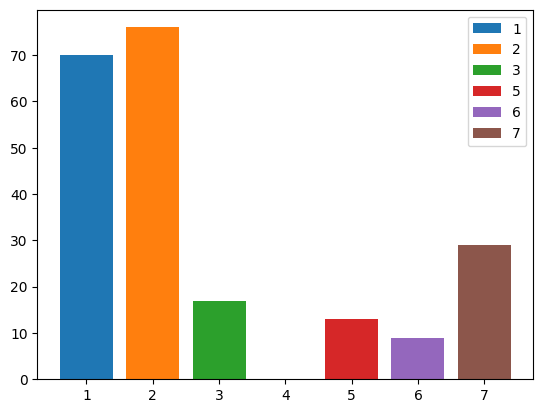

In [14]:
# 시각화 진행

for compo in target : 
    plt.bar(compo, len(df[df['target'] == compo]), label=str(compo))

plt.legend()
plt.show()

위를 확인해보면, target 도수가 불균형하여 추후 분류 시 편향이 발생할 가능성이 높다. 따라서 **train_test_split 함수에서 stratify 옵션을 사용**하는 것이 핵심이 되겠다. 이 옵션은 학습 데이터셋과 테스트 데이터셋 내에서 목표 변수의 분포를 동일하게 유지할 것이다.

#### 1-4) seaborn을 통한 상관관계 heatmap 및 전체 histplot 시각화

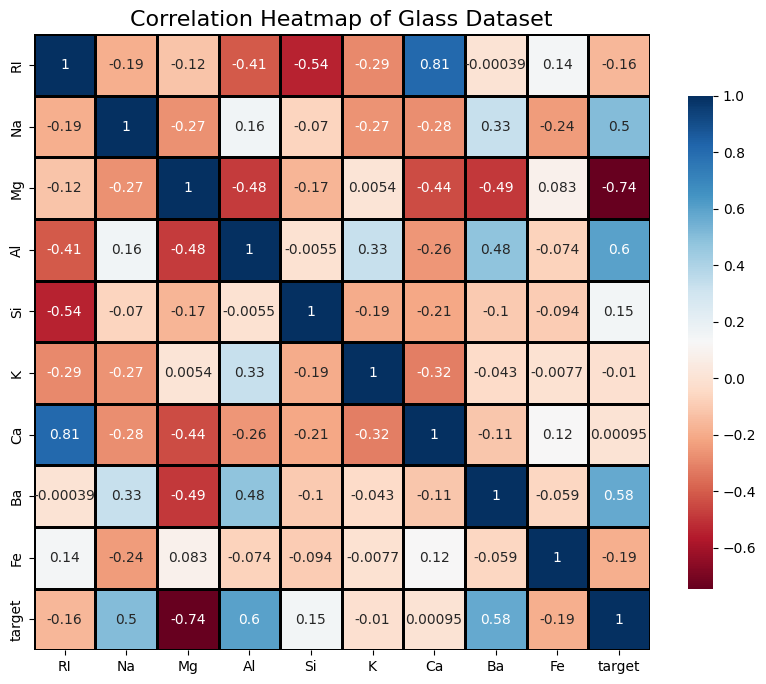

In [15]:
# seaborn을 통하여 heatmap 시각화
# 상관계수 행렬, 각 변수 간의 선형적 관계를 시각적으로 표시

# id 열은 제외
correlation_matrix = df[['RI', 'Na', 'Mg', 
                         'Al', 'Si', 'K', 
                         'Ca', 'Ba', 'Fe', 'target']].corr() 
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', square=True,
            linewidths=1, linecolor='black', cbar_kws={"shrink": 0.8})

plt.title('Correlation Heatmap of Glass Dataset', fontsize=16)
plt.show()

위 heatmap는 음수로 갈 수록 음의 상관관계(반비례), 양수로 갈 수록 양의 상관관계(정비례)를 의미한다. 또한 diagonal을 중심으로 각 part가 대칭이다. (symmetric) figure를 보고 주목해야 할 부분은 아래와 같이 분석할 수 있다.

- **높은 양의 상관관계**
    - **RI와 Ca** : 상관계수 = 0.81
      - 굴절률(RI)이 높을수록 유리 내 칼슘(Ca) 함량이 높을 것이다.

    - **Na와 target** : 상관계수 = 0.5
      - 나트륨(Na) 함량이 높을수록 target 또한 높아진다.

    - **Al와 target** : 상관계수 = 0.6
      - 알루미늄(Al) 함량이 높을수록 target 또한 높아진다.

    - **Ba와 target** : 상관계수 = 0.58
      - 바륨(Ba) 함량이 높을수록 target 또한 높아진다.
      
- **높은 음의 상관관계**
    - **Mg와 target** : 상관계수 = -0.74
      - 마그네슘(Mg) 함량이 높을수록 target은 낮아진다.
    - **RI와 Si** : 상관계수 = -0.54
      - 굴절률(RI)이 높을수록 유리 내 실리콘(Si) 함량이 낮을 것이다.
    - **Al와 Mg** : 상관계수 = -0.48
      - 알루미늄(Al) 함량이 높을수록 마그네슘(Mg) 함량이 낮을 것이다.
    - **Ca와 Mg** : 상관계수 = -0.44
      -  칼슘(Ca) 함량이 높을수록 마그네슘(Mg) 함량이 낮을 것이다.

위 **높은 양의 상관관계**를 주목할 것. target이 의미하는 바를 다시 정리해보자면 아래와 같다.

- **building_windows_float_processed (건축물의 플로트 공정 창문)**: 건축물에 사용되는 플로트 공정으로 처리된 창문 유리
- **building_windows_non_float_processed (건축물의 비플로트 공정 창문)**: 건축물에 사용되는 비플로트 공정으로 처리된 창문 유리
- **vehicle_windows_float_processed (차량의 플로트 공정 창문)**: 차량에 사용되는 플로트 공정으로 처리된 창문 유리
- **vehicle_windows_non_float_processed (차량의 비플로트 공정 창문)**: 차량에 사용되는 비플로트 공정으로 처리된 창문 유리 (이 데이터베이스에는 존재 X)
- **containers (용기)**: 병이나 항아리와 같은 용기 유리
- **tableware (식기류)**: 접시나 컵과 같은 식기류 유리
- **headlamps (헤드램프)**: 차량의 헤드램프에 사용되는 유리

높은 양의 상관관계에서 각 feature에 따라서 비례적인 상관관계를 가지기 때문에, 이 사실을 regression을 이용할 때 참고할 수 있다고 생각한다. **./regression_diabetes**을 보면, 각 model에 대한 score가 처참한 것을 확인 가능한데, 이번 regression에서는 알짜베기 feature (학습에 도움이 될, 상관관계가 높은 feature) 만 selection하여 score을 최대한 높이는 데에 초점을 둘 것이다.

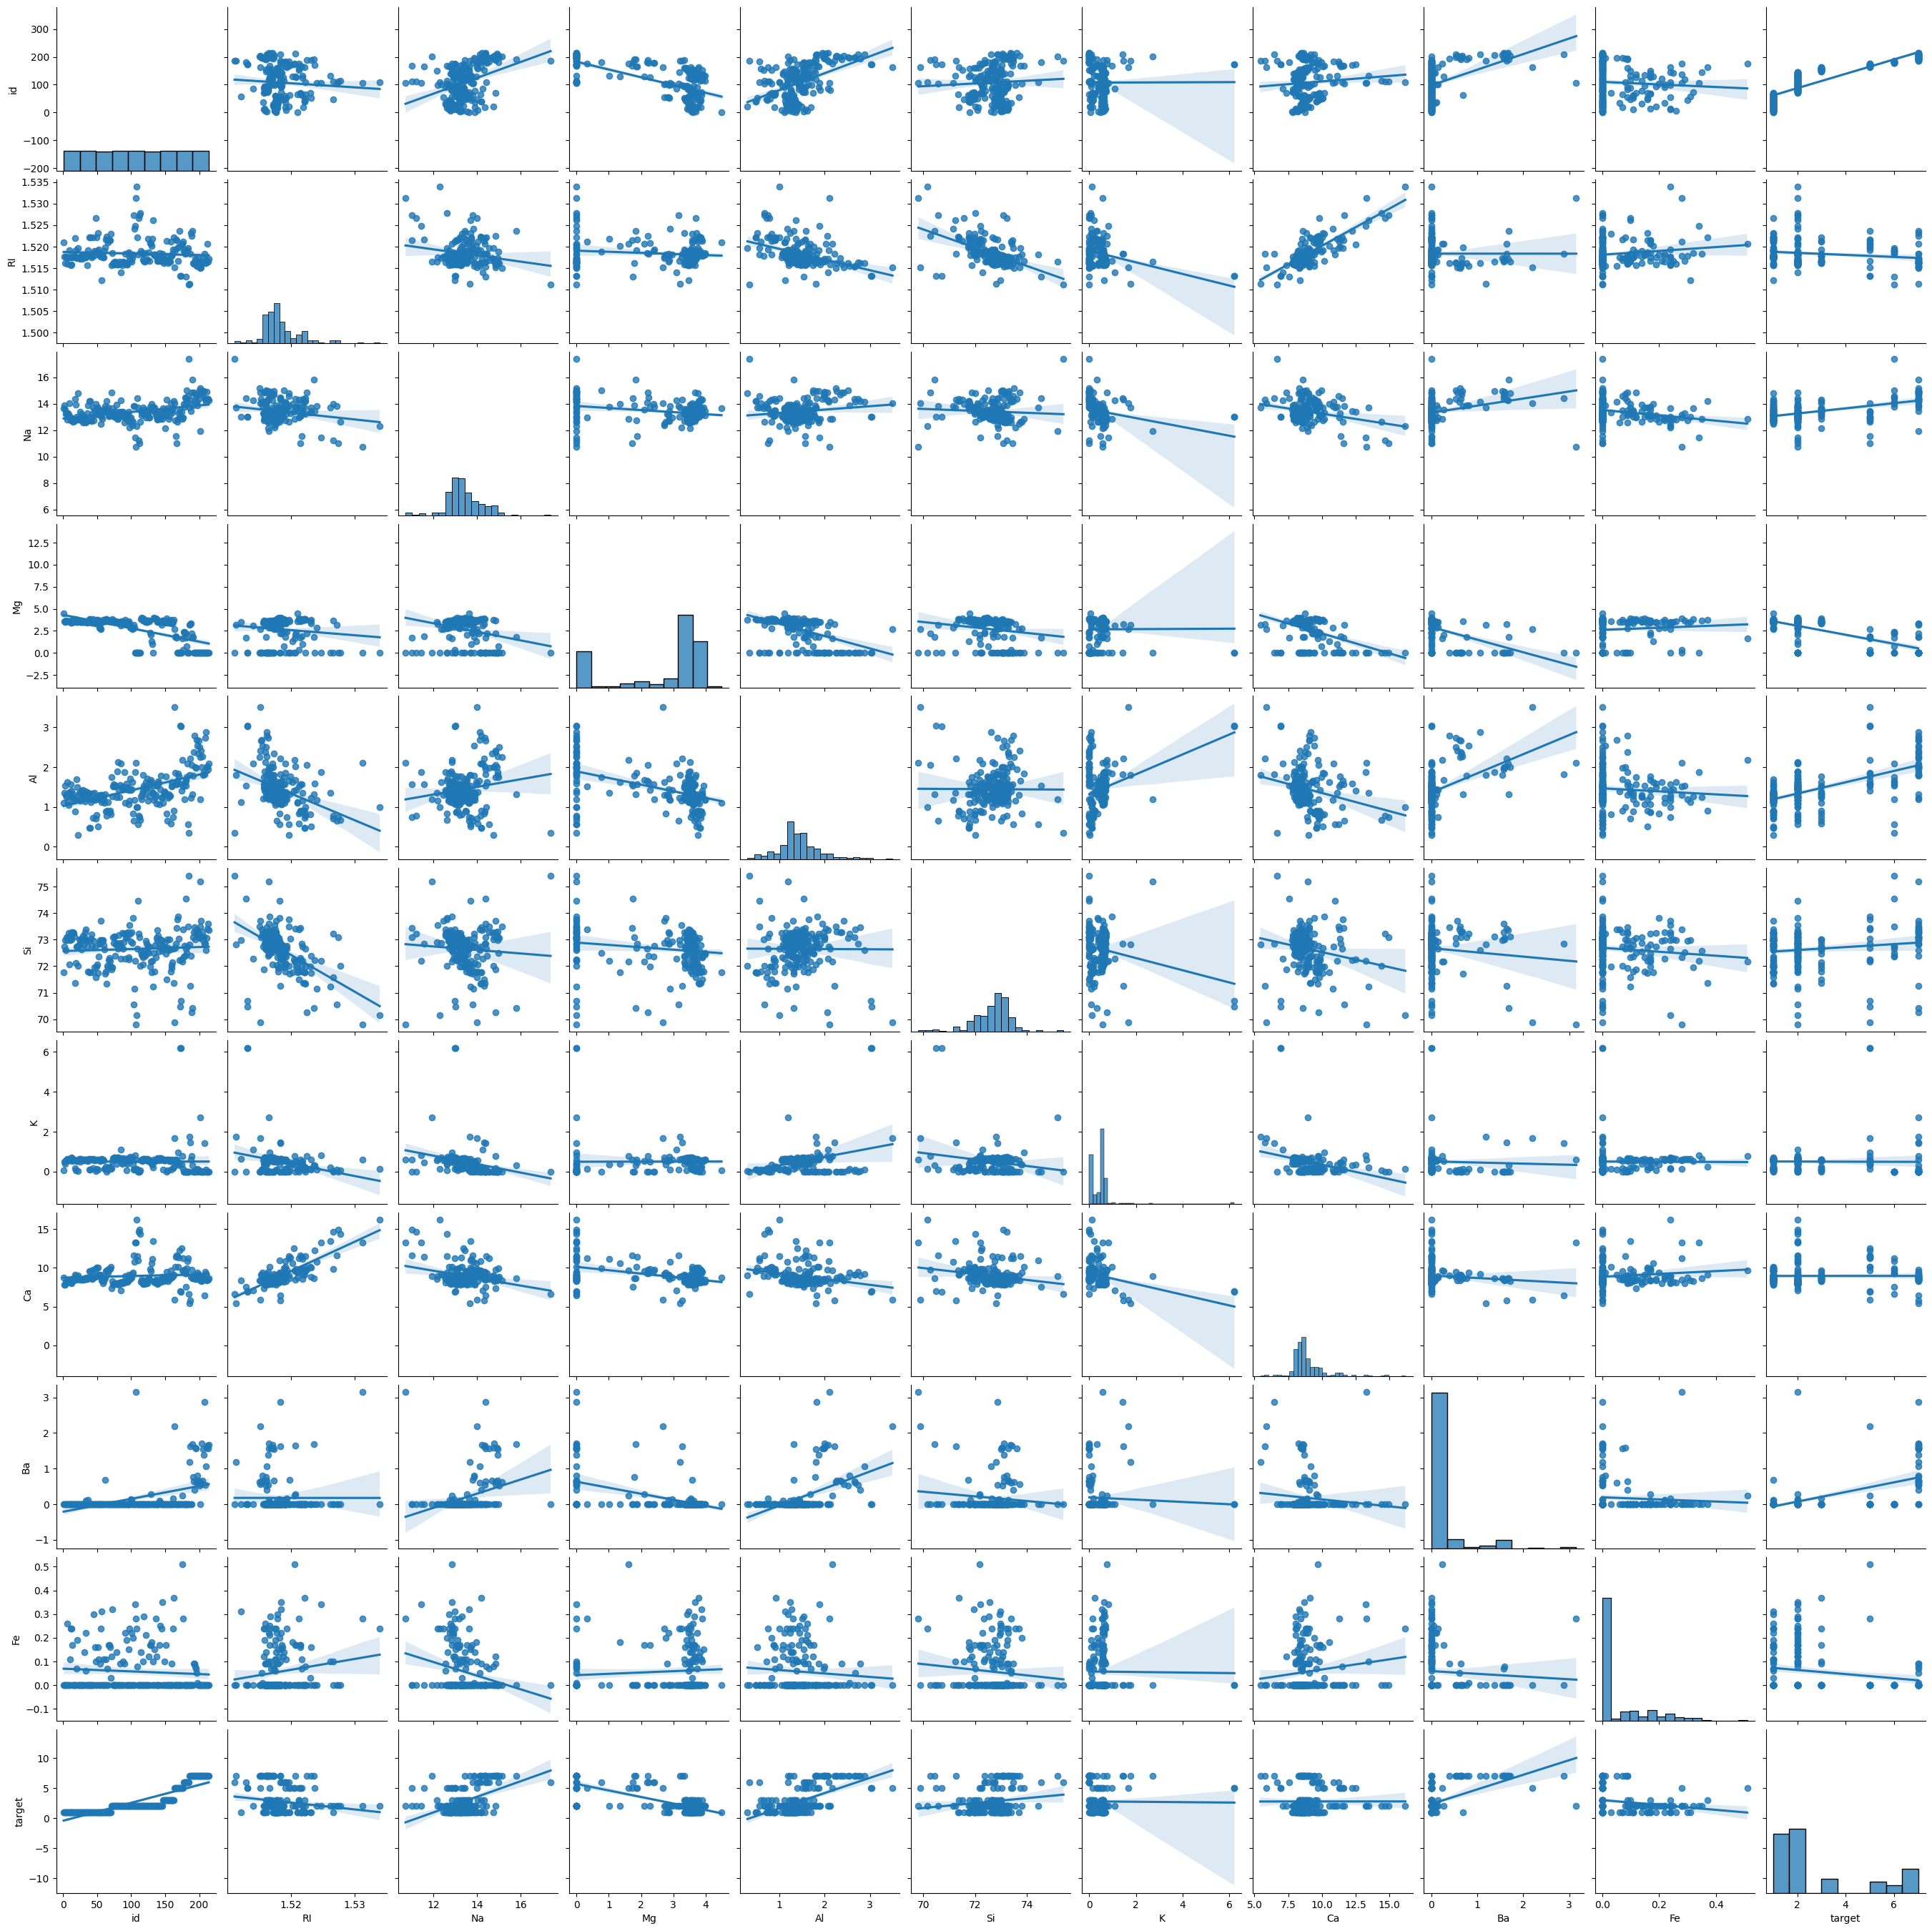

In [16]:
# seaborn을 통하여 pairplot 시각화
# 현재 데이터프레임의 모든 열 쌍에 대한 산점도와 히스토그램을 시각화한다

sns.pairplot(df[df.columns], kind="reg") 
plt.show()

------

#### 1-5) 각 attribute에 대한 box plot 시각화

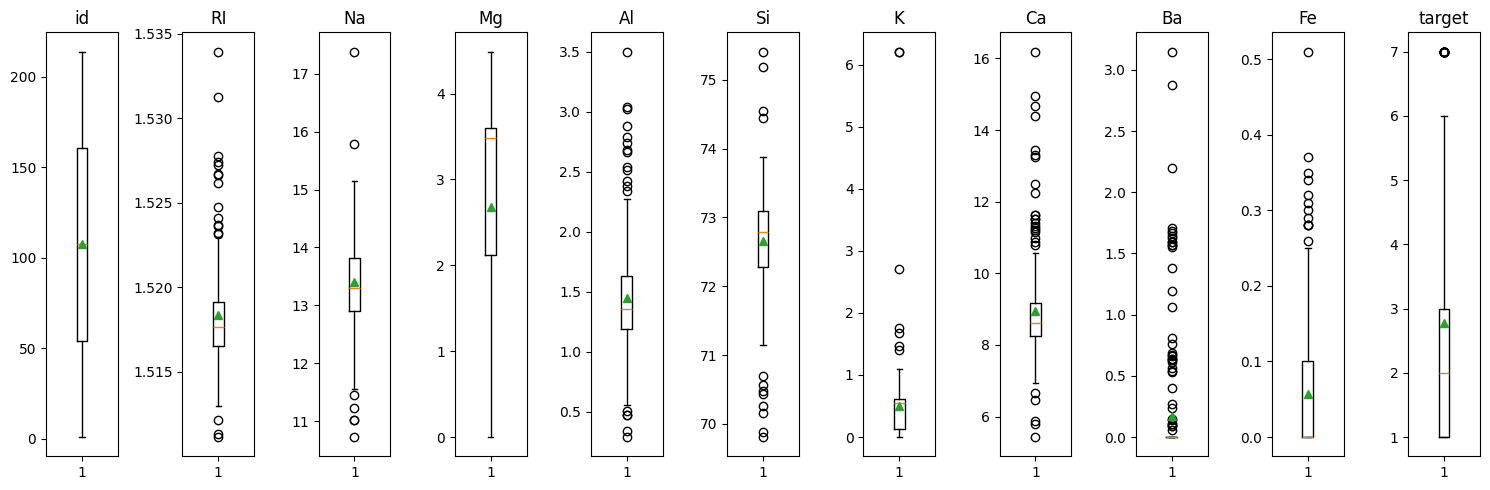

In [17]:
# box plot 그려 데이터 분포 확인

# subplot 생성
fig, axes = plt.subplots(nrows=1, ncols=df.shape[1], figsize=(15, 5))

# 각 변수에 대한 boxplot 그리기
for i, var in enumerate(df.columns) :
    ax = axes[i]
    ax.boxplot(df[var], showmeans=True)
    ax.set_title(var)

plt.tight_layout()
plt.show()

------

### 2. 데이터 전처리

1에서 분석한 바를 토대로 전처리를 진행한다.
- **전처리**
    - 결측치는 그 feature (열)의 평균으로 fill
    - Z-score normalization 진행 
    - 특정 열 삭제

#### 2-1) 'id' 열 삭제
- id 열은 각 records의 번호를 의미하면서, 이것이 현 classification이 사용되지는 않는다.
- 따라서 drop을 이용해 삭제할 예정.

In [18]:
# 'id'열 삭제

df = df.drop('id', axis=1)
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,target
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


#### 2-2) 결측치 확인 및 fill 

In [19]:
# 결측치 확인

df.isnull()

# info에서도 확인하였듯이, 결측치 없음

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,target
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
209,False,False,False,False,False,False,False,False,False,False
210,False,False,False,False,False,False,False,False,False,False
211,False,False,False,False,False,False,False,False,False,False
212,False,False,False,False,False,False,False,False,False,False


위를 보면, 본 데이터에 결측치가 **전혀** 존재하지 않고 있다. 따라서 결측치에 따른 전처리를 진행하지 않아도 된다.

#### 2-3) 정규화 (normalization) - Z-score normalization

- 각 feature의 scale이 서로 달라, SVM, logistic regression 전에 StandardScaler를 통한 스케일링이 필요
- 따라서 StandardScaler를 통한 Z-score normalization을 수행

In [20]:
# input과 target으로 df를 split

glass_input = df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']].to_numpy() 
glass_target = df['target'].to_numpy()

In [21]:
# X_train, y_train, X_test, y_test으로 train set, test set 각각 8:2로 split
# stratify 옵션을 적용하여 편향 방지

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(glass_input, glass_target, 
                                                   stratify=glass_target, 
                                                    test_size=0.2)

In [22]:
# StandardScaler을 통한 정규화 진행

from sklearn.preprocessing import StandardScaler
ss_transformer = StandardScaler()

ss_transformer.fit(X_train)

X_train_scaled = ss_transformer.transform(X_train)
X_test_scaled = ss_transformer.transform(X_test)
glass_input_scaled = ss_transformer.transform(glass_input)

In [23]:
# score가 좋지 않을 때, 추후 사용할 data (feature selection)
# 사용할 feature : Na, Al, Ba

glass_input_fs = df[['Na', 'Al', 'Ba']].to_numpy() 

X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(glass_input_fs, glass_target, 
                                                   stratify=glass_target, 
                                                    test_size=0.2)

ss_transformer = StandardScaler()

ss_transformer.fit(X_train_fs)

X_train_fs_scaled = ss_transformer.transform(X_train_fs)
X_test_fs_scaled = ss_transformer.transform(X_test_fs)

-------

### 3. 각종 모델을 적용하여 classification
- KNN, SVM, logistic regression, decision tree, random forest, K-means 사용하여 classification
- 순서는 KNN, SVM, logistic regression, decision tree, random forest, K-means
- **CAUTION** : <혼자 공부하는 머신러닝&딥러닝>의 '머신러닝' 파트를 복습하면서 진행하는 것이기 때문에 설명이 길 수 있음

우선, 모델을 적용하기 전, 이 책의 머신러닝 파트에서 했었던 모든 스토리라인을 작성해보려고 한다.

- KNN을 이용하여 bream과 smelt를 분류
    - 정확도 100%을 보고 이상함을 직감 -> train set, test set의 필요성을 알고 split
    - 잘못 split해서 0% -> 샘플링 편향
    - 거리가 이상함 -> scaling (StandardScaler)
- KNR을 이용하여 perch의 무게를 예측
    - 결정계수 R^2, MSE를 계산하여 예측에서 빗나간 정도를 가늠하였음
    - 과대적합, 과소적합 문제가 등장
- linear regression을 이용하여 perch의 무게를 예측
    - 과소적합되었음 -> polynormial regression을 이용하여 해결
    - score을 올리기 위해 PolynormialFeature를 통한 feature 수 증가 -> R^2 값이 음수가 나옴 -> 규제 도입
        - 선형회귀에서의 규제 : ridge, lasso
- logistic regression을 이용하여 럭키백 분류
    - 각 특성의 중요도인 feature_importances 도입
    - 각 class별로 예측 확률을 출력하는 predict_proba
        - 확률을 계산하게 해주는 함수 도입
            - sigmoid : 이중 분류
            - softmax : 다중 분류
- SGD를 활용하여 점진적 학습을 진행, 딥러닝의 기본 원리 이해
    - 경사하강법이려면 데이터가 연속적이어야 한다
    - 경사하강법의 종류 : 미니배치, 배치, 전체
    - 손실함수 정의
        - 이진 분류 : binary-crossentropy (logistic)
        - 다중 분류 : crossentropy
        - 회귀 : MSE
- decision tree를 이용하여 wine 분류
    - 처음에 logistic regression으로 분류 해결하였다가 시각적으로 눈에 들어오지 않아 롤백 -> 의사 결정 트리 도입
    - gini 계수가 작아지는 방향으로 test를 하향배치
    - test에 적합한 model이 만들어지는거 아니냐는 일침으로 validation set이 투입 -> 6 : 2 : 2로 data를 split하게 됨 -> 학습 데이터가 적어지는 것을 막기 위하여 grid search, random search 도입
    

#### 3-1) KNN

<img src='https://miro.medium.com/v2/resize:fit:1400/0*ksMa1Of3NFCvHo_Y' width='500px'>

- 순서는 아래와 같다.
    - (1) 예측하고자 하는 instacnce와 나머지 모든 instance의 euclidean distance를 전부 재본다
    - (2) distance를 정렬하였을 때, 가장 가까운 거리 순으로 K개의 data의 class를 확인한다
    - (3) class 중 다수에 해당되는 class를 데이터의 category로 삼는다.
- 훈련 세트를 저장하는 것이 훈련의 전부 (사례 기반 학습 알고리즘)
- hyperparameter인 n_neighbors의 조정으로 tuning 가능
- 장점 
    - 가장 단순한 알고리즘
    - records가 적은 data일 때 유리
- 단점 
    - records가 많은 data라면 각각의 distance를 구하는데 시간이 오래 걸림
    - 원리가 매우 단순하여 underfitting될 가능성 있음
    - 각 feature의 scale이 다를 시 scaling이 필요

In [24]:
# KNN을 활용한 모델 fit 및 train score, test score 출력
# 이때, n_neighbors 하이퍼파라미터를 조정해나가면서, 점수를 get

from sklearn.neighbors import KNeighborsClassifier

score_list = [] # [n_neighbors, [train score, test score]]

# n_neighbors를 3부터 107까지 진행 -> 데이터의 절반 (214/2 = 107)까지 값을 테스트하여 최적의 값 찾기

for num in range (3, 108) :
    knn = KNeighborsClassifier(n_neighbors=num)
    knn.fit (X_train_scaled, y_train)
    
    current_score = [num, [knn.score(X_train_scaled, y_train),
                             knn.score(X_test_scaled, y_test)]]
    score_list.append (current_score)
    print (f'n_neighbors : {num} | train score : {current_score[1][0]}, test score : {current_score[1][1]}')

n_neighbors : 3 | train score : 0.8304093567251462, test score : 0.6046511627906976
n_neighbors : 4 | train score : 0.7953216374269005, test score : 0.6511627906976745
n_neighbors : 5 | train score : 0.7660818713450293, test score : 0.6046511627906976
n_neighbors : 6 | train score : 0.7309941520467836, test score : 0.6511627906976745
n_neighbors : 7 | train score : 0.7134502923976608, test score : 0.6744186046511628
n_neighbors : 8 | train score : 0.7192982456140351, test score : 0.627906976744186
n_neighbors : 9 | train score : 0.7251461988304093, test score : 0.6511627906976745
n_neighbors : 10 | train score : 0.6900584795321637, test score : 0.6511627906976745
n_neighbors : 11 | train score : 0.7017543859649122, test score : 0.6046511627906976
n_neighbors : 12 | train score : 0.7017543859649122, test score : 0.5813953488372093
n_neighbors : 13 | train score : 0.7017543859649122, test score : 0.5813953488372093
n_neighbors : 14 | train score : 0.672514619883041, test score : 0.558139

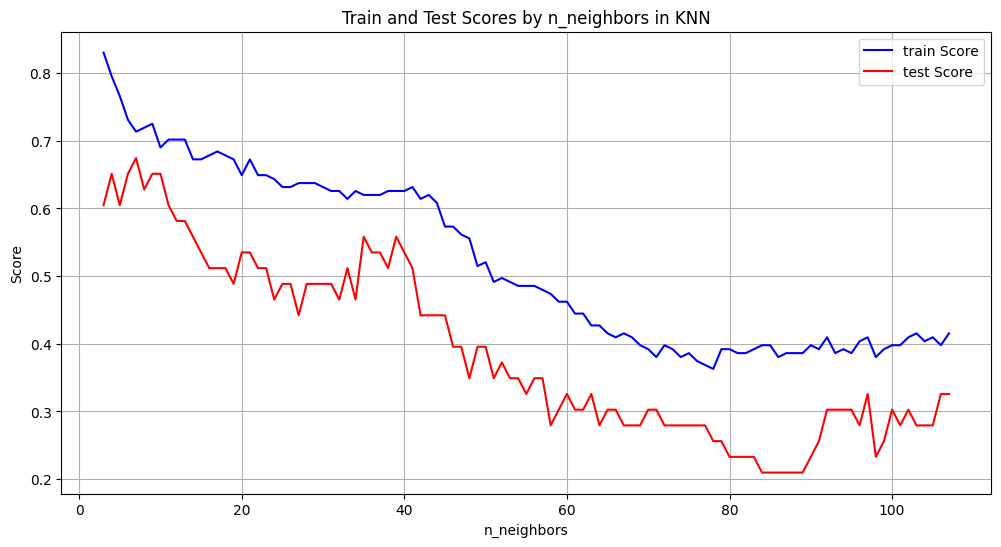

In [25]:
# 위 결과를 시각화화여 가장 적합한 n_neighbors 파라미터를 찾는다

n_neighbors_values = [score[0] for score in score_list] # n_neighbors
train_scores = [score[1][0] for score in score_list] # train score
test_scores = [score[1][1] for score in score_list] # test score

plt.figure(figsize=(12, 6))
plt.plot(n_neighbors_values, train_scores, label='train Score', color='blue')
plt.plot(n_neighbors_values, test_scores, label='test Score', color='red')
plt.xlabel('n_neighbors')
plt.ylabel('Score')
plt.title('Train and Test Scores by n_neighbors in KNN')
plt.legend()
plt.grid(True)
plt.show()

위 figure을 보고 아래와 같이 분석 가능하다.

- (1) 현재 train score은 n_neighbors 하이퍼파라미터가 증가함에 따라 감소하는 우하향의 추세를 보인다. 이는 다른 dataset을 classification하였을 때에도 발생하였던 양상과 동일하다. 
- (2) test score은 train score 추세선과 비슷한 양상으로 우하향한다.

In [36]:
# n_neighbors=7으로 fit, score

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit (X_train_scaled, y_train)

score1 = [knn.score(X_train_scaled, y_train), knn.score(X_test_scaled, y_test)]
print (f"train score, test score : {score1}")

train score, test score : [0.7134502923976608, 0.6744186046511628]


report :
               precision    recall  f1-score   support

           1       0.87      0.65      0.74        94
           2       0.68      0.71      0.70        73
           3       0.00      0.00      0.00         3
           5       0.54      0.88      0.67         8
           6       0.78      0.70      0.74        10
           7       0.83      0.92      0.87        26

    accuracy                           0.71       214
   macro avg       0.62      0.64      0.62       214
weighted avg       0.77      0.71      0.73       214

[[61 19 12  0  0  2]
 [ 7 52  5  5  1  3]
 [ 2  1  0  0  0  0]
 [ 0  1  0  7  0  0]
 [ 0  3  0  0  7  0]
 [ 0  0  0  1  1 24]]


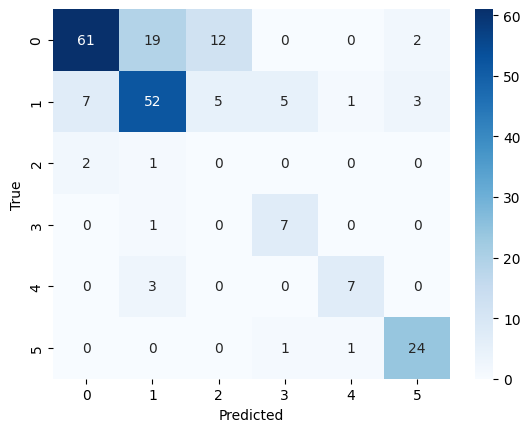

In [37]:
# report 및 confusion matrix

from sklearn.metrics import confusion_matrix, classification_report

y_pred = knn.predict(glass_input_scaled)

print("report :\n", classification_report(y_pred, glass_target))
cm = confusion_matrix(y_pred, glass_target)

print (cm)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

점수가 그리 마음에 들지 않아, 일전에 feature selection한 모델로 다시 위 과정을 진행해본다.

In [28]:
score_list = [] # [n_neighbors, [train score, test score]]

# n_neighbors를 3부터 107까지 진행 -> 데이터의 절반 (214/2 = 107)까지 값을 테스트하여 최적의 값 찾기

for num in range (3, 108) :
    knn = KNeighborsClassifier(n_neighbors=num)
    knn.fit (X_train_fs_scaled, y_train)
    
    current_score = [num, [knn.score(X_train_fs_scaled, y_train_fs),
                             knn.score(X_test_fs_scaled, y_test_fs)]]
    score_list.append (current_score)
    print (f'n_neighbors : {num} | train score : {current_score[1][0]}, test score : {current_score[1][1]}')

n_neighbors : 3 | train score : 0.3391812865497076, test score : 0.37209302325581395
n_neighbors : 4 | train score : 0.30994152046783624, test score : 0.3953488372093023
n_neighbors : 5 | train score : 0.30409356725146197, test score : 0.4186046511627907
n_neighbors : 6 | train score : 0.30409356725146197, test score : 0.4186046511627907
n_neighbors : 7 | train score : 0.3333333333333333, test score : 0.4186046511627907
n_neighbors : 8 | train score : 0.3333333333333333, test score : 0.4418604651162791
n_neighbors : 9 | train score : 0.32748538011695905, test score : 0.4418604651162791
n_neighbors : 10 | train score : 0.34502923976608185, test score : 0.46511627906976744
n_neighbors : 11 | train score : 0.3684210526315789, test score : 0.4186046511627907
n_neighbors : 12 | train score : 0.3567251461988304, test score : 0.4418604651162791
n_neighbors : 13 | train score : 0.391812865497076, test score : 0.46511627906976744
n_neighbors : 14 | train score : 0.3742690058479532, test score :

자세한 설명을 생략하도록 하자. 

#### 3-2) SVM (Support Vector Machine)

<img src="https://blog.kakaocdn.net/dn/dyU2w7/btqNe5n7NPN/0KrOvyF6RM8jYOTHwOYIv0/img.png" width="500px">

- SVM은 이중 분류에 특화되어 있으면서, 각 class를 잘 분류 가능한 hyperplane을 찾는 알고리즘임
- SVM 원리
    - 결정 경계를 찾는데, 결정 경계 주변에 있는 support vector와의 거리인 margin을 최대화할 수 있는 plane을 찾는 것
    - 차원 (즉 feature)가 늘어날 수록 어려우며, 위는 2차원이니 선형함수로 hyperplane을 찾은 거지만, n차원이면 n-1차원의 함수를 사용하여 plane을 찾아야 함
- SVM 종류
    - 선형 SVM 
        - soft margin : 오차를 어느 정도 허용하여, margin 안에 instance가 들어가도 됨
        - hard margin : margin 안에 instance를 절대로 허용하지 않음
        - C값을 조정하여 soft margin or hard margin을 선정
            - C가 커지면 overfitting될 가능성 높아짐
            - C가 작아지면 경계가 흐려져 underfitting될 가능성 높아짐
    - 비선형 SVM 
        - 비선형적이다 -> 차원을 한 단계 늘려서 classification하면 됨 -> 그러면 mapping function 사용해야함 -> 계산량 많아짐 -> "kernel" 사용 (실질적으로 차원을 늘리지 않고, 차원을 늘리는 것처럼 계산해줌)
        - kernel의 종류
            - RBF
                - gamma 파라미터가 생김 (기존 C에 추가)
                    - 전제 : 비선형 SVM이기 때문에 결정 경계에 곡률이 존재할 것
                    - gamma가 커지면 곡률이 커지면서 overfitting될 가능성 높아짐
                    - 작으면 곡률이 작아지면서 underfitting될 가능성 높아짐
            - sigmoid
            - polynormial
            
여기서는 가우시안 RBF를 kernel로 사용하고, 적절한 C값과 gamma를 찾기 위해 random search를 진행한다. 그리드는 아래와 같이 정의한다
- C : 0.1부터 20.0까지 uniform
- gamma : 0.1부터 20.0까지 uniform
- epoch는 100번, 모든 코어를 가동

In [51]:
# random search 통하여 최적의 hyperparameter 

from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm

param_grid = {
    'C' : uniform(0.1, 20.0), 
    'gamma' : uniform(0.1, 20.0)
}

svm = svm.SVC(kernel='rbf')

rs = RandomizedSearchCV(svm, param_grid, n_iter=100, n_jobs=-1) # core 전부 돌리기, epoch 100번
rs.fit (X_train_scaled, y_train)

print ("best parameter : ", rs.best_params_)
print ("validation score : ", np.max(rs.cv_results_['mean_test_score'])) # 최상의 교차 검증 점수
print ("best model : ", rs.best_estimator_) 

svm = rs.best_estimator_

print ('train score : ', svm.score(X_train_scaled, y_train))
print ('test score : ', svm.score(X_test_scaled, y_test))

best parameter :  {'C': 5.657484921127962, 'gamma': 0.8341185748225198}
validation score :  0.6727731092436975
best model :  SVC(C=5.657484921127962, gamma=0.8341185748225198)
train score :  0.9766081871345029
test score :  0.6976744186046512


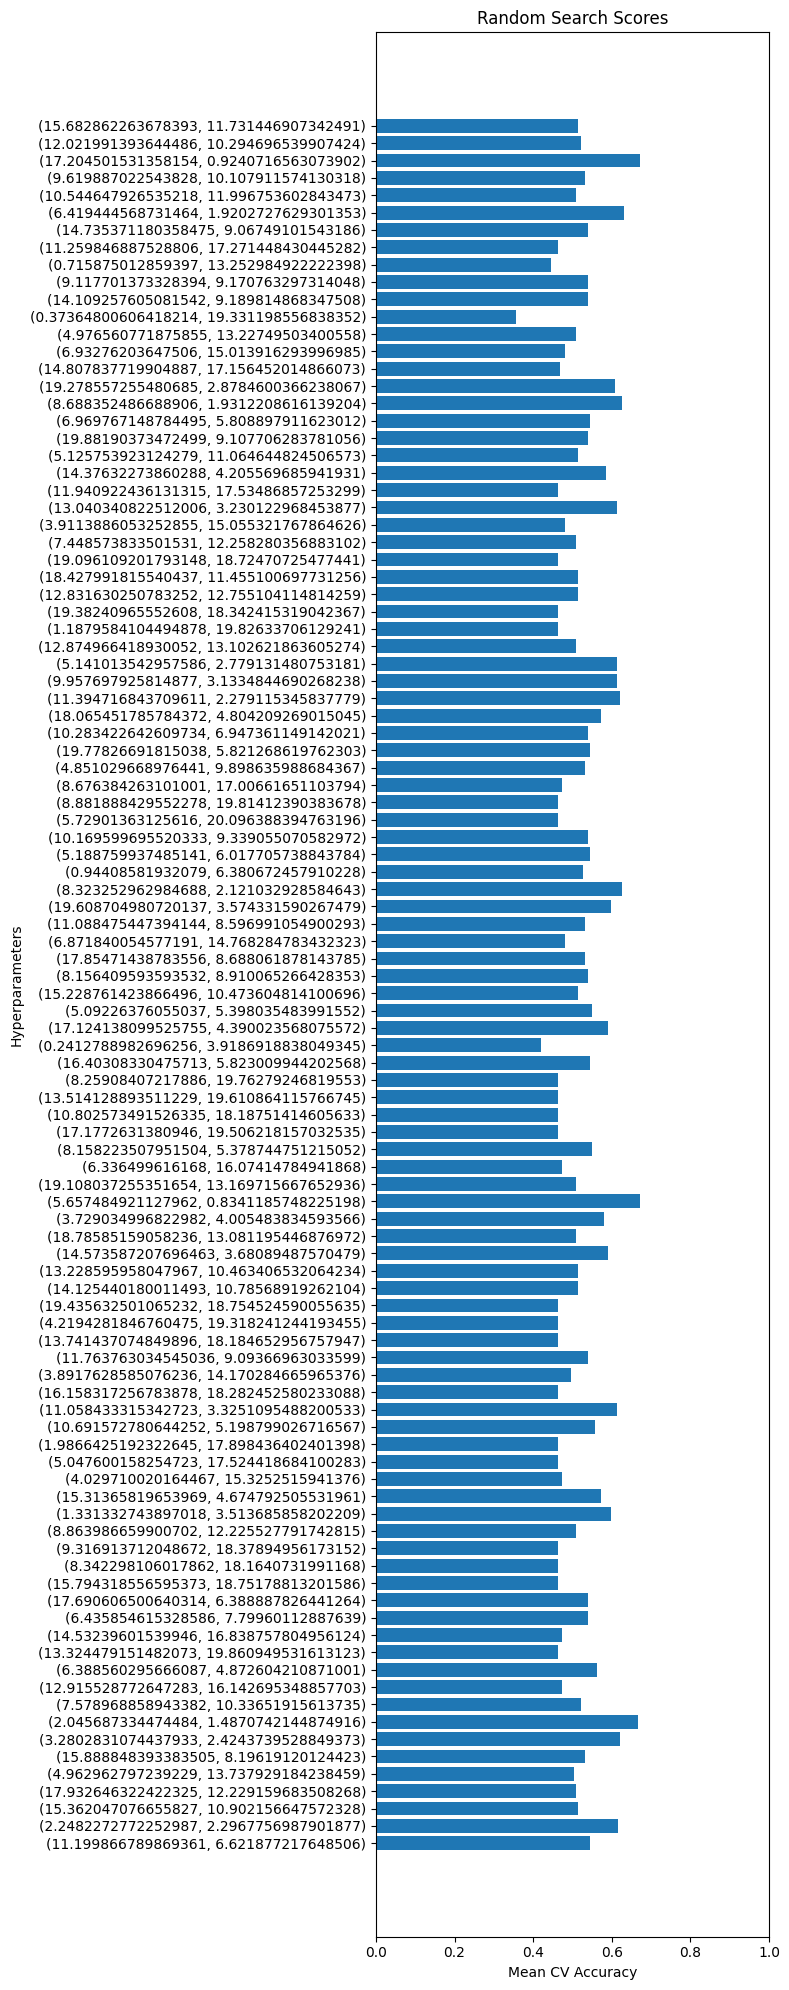

In [52]:
# 하이퍼파라미터 조합별 성능 시각화

# 각 하이퍼파라미터 조합별 교차 검증 스코어 가져오기
results = rs.cv_results_
mean_scores = results['mean_test_score']
params = results['params']

# 시각화를 위한 데이터 준비
C_values = [params[i]['C'] for i in range(len(params))]
gamma_values = [params[i]['gamma'] for i in range(len(params))]

# 가로 방향으로 막대 그래프로 교차 검증 스코어 시각화
fig, ax = plt.subplots(figsize=(8, 20))
bars = ax.barh(range(len(mean_scores)), mean_scores, tick_label=[f"({C}, {gamma})" for C, gamma in zip(C_values, gamma_values)])
ax.set_ylabel('Hyperparameters')
ax.set_xlabel('Mean CV Accuracy')
ax.set_title('Random Search Scores')
plt.xlim([0, 1])  # x 축 범위 설정 (필요에 따라 조정 가능)
plt.tight_layout()
plt.show()

따라서 C=5.657484921127962, gamma=0.8341185748225198으로 설정하여 SVM 할 시 가장 score가 크다는 것을 알 수 있다.

report :
               precision    recall  f1-score   support

           1       0.91      0.94      0.93        68
           2       0.92      0.89      0.90        79
           3       0.94      0.84      0.89        19
           5       1.00      1.00      1.00        13
           6       0.78      1.00      0.88         7
           7       0.93      0.96      0.95        28

    accuracy                           0.92       214
   macro avg       0.91      0.94      0.92       214
weighted avg       0.92      0.92      0.92       214

[[64  4  0  0  0  0]
 [ 4 70  1  0  2  2]
 [ 2  1 16  0  0  0]
 [ 0  0  0 13  0  0]
 [ 0  0  0  0  7  0]
 [ 0  1  0  0  0 27]]


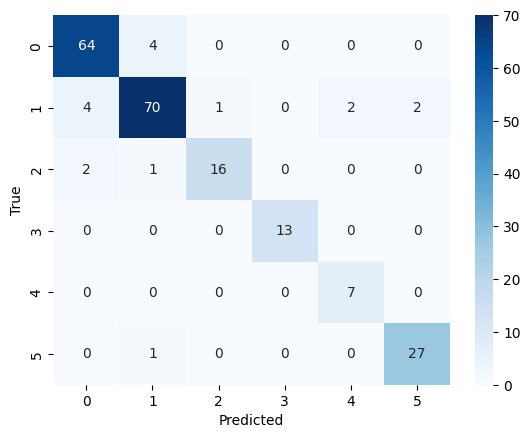

In [53]:
# report 및 confusion matrix

y_pred = svm.predict(glass_input_scaled)

print("report :\n", classification_report(y_pred, glass_target))
cm = confusion_matrix(y_pred, glass_target)

print (cm)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


#### 3-3) LR (logistic regression)

<img src="https://editor.analyticsvidhya.com/uploads/23302main-qimg-7fc9e8601c15e33945720800aa237a7f.png" width="500px">

- 발단
    - (1) multiple regression에서 classification으로 변경 후에 범주형 y를 시각화하였더니, 중간 변수가 존재하지 않아 이산적인 그래프의 형태가 나타남
    - (2) Y가 범주형 변수라면 다중선형회귀 모델을 그대로 적용할 수 없음
    - (3) 그래서 logistic function (sigmoid function)을 도입하여 각 class에 대한 확률을 출력할 수 있도록 함
    
- 회귀식의 장점을 그대로 유지하고, 종속변수를 범주형이 아닌 확률로 둔 알고리즘
- odds (승산)의 개념을 이용하여 함수를 휘게 만듦 (중간 값은 0.5)
    - <img src="https://i.imgur.com/euw7qQu.png" width="500px">
    - activation function
        - 이중 분류 : sigmoid 
        - 다중 분류 : softmax
        
적절한 hyperparameter를 찾기 위해 grid search를 진행한다. 그리드는 아래와 같이 정의한다

- solver : 'liblinear' 혹은 'lbfgs'
- penalty : 'l1' 혹은 'l2' 규제
- C : 0.01, 0.1, 1, 5, 10, 20, 50, 100
- 모든 코어 가동, cv는 3

In [55]:
# random search 통하여 최적의 hyperparameter 

from scipy.stats import randint, uniform
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {'solver': ['liblinear', 'lbfgs'], 
          'penalty': ['l1', 'l2'], 
          'C': [0.01, 0.1, 1, 5, 10, 20, 50, 100]}

lr = LogisticRegression()

gs = GridSearchCV(lr, param_grid, cv=3, n_jobs=-1) # core 전부 돌리기, cv=3
gs.fit (X_train_scaled, y_train)

print ("best parameter : ", gs.best_params_)
print ("validation score : ", np.max(gs.cv_results_['mean_test_score'])) # 최상의 교차 검증 점수
print ("best model : ", gs.best_estimator_) 

lr = gs.best_estimator_

print ('train score : ', lr.score(X_train_scaled, y_train))
print ('test score : ', lr.score(X_test_scaled, y_test))

best parameter :  {'C': 50, 'penalty': 'l2', 'solver': 'liblinear'}
validation score :  nan
best model :  LogisticRegression(C=50, solver='liblinear')
train score :  0.7602339181286549
test score :  0.6046511627906976


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

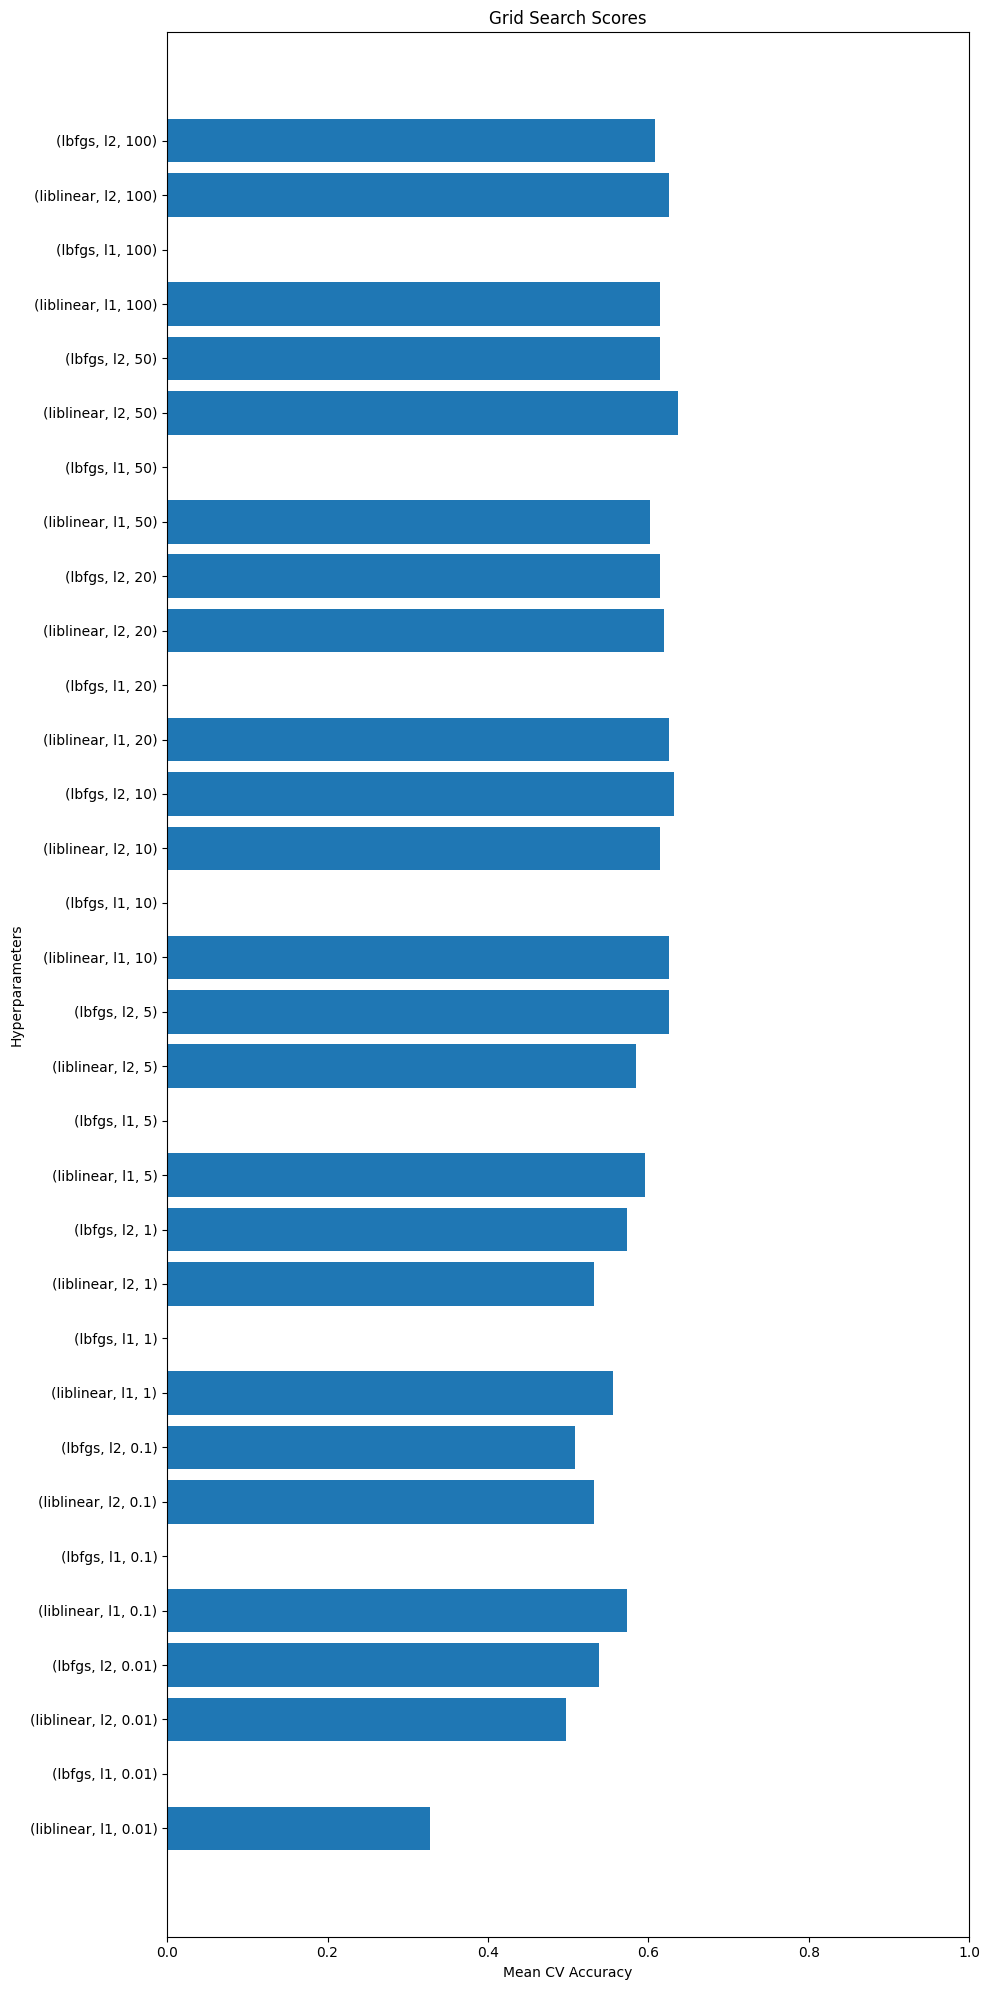

In [56]:
# 각 하이퍼파라미터 조합별 교차 검증 스코어 가져오기
results = gs.cv_results_
mean_scores = results['mean_test_score']
params = results['params']

# 시각화를 위한 데이터 준비
C_values = [params[i]['C'] for i in range(len(params))]
solver_values = [params[i]['solver'] for i in range(len(params))]
penalty_values = [params[i]['penalty'] for i in range(len(params))]

# 하이퍼파라미터 조합을 문자열로 변환
param_combinations = [f"({solver}, {penalty}, {C})" for solver, penalty, C in zip(solver_values, penalty_values, C_values)]

# 가로 방향으로 막대 그래프로 교차 검증 스코어 시각화
fig, ax = plt.subplots(figsize=(10, 20))
bars = ax.barh(range(len(mean_scores)), mean_scores, tick_label=param_combinations)
ax.set_ylabel('Hyperparameters')
ax.set_xlabel('Mean CV Accuracy')
ax.set_title('Grid Search Scores')
plt.xlim([0, 1])  # x 축 범위 설정 (필요에 따라 조정 가능)
plt.tight_layout()
plt.show()


report :
               precision    recall  f1-score   support

           1       0.73      0.68      0.70        75
           2       0.78      0.67      0.72        88
           3       0.24      0.67      0.35         6
           5       0.46      0.86      0.60         7
           6       1.00      0.90      0.95        10
           7       0.93      0.96      0.95        28

    accuracy                           0.73       214
   macro avg       0.69      0.79      0.71       214
weighted avg       0.76      0.73      0.74       214

[[51 15  8  0  0  1]
 [17 59  5  6  0  1]
 [ 2  0  4  0  0  0]
 [ 0  1  0  6  0  0]
 [ 0  1  0  0  9  0]
 [ 0  0  0  1  0 27]]
rate : [5.38005222e+01 2.78387517e+01 1.49602278e+01 8.74624052e-03
 3.36361194e+00 2.81400994e-02] | real : 1
rate : [61.7117883  34.55350401  1.60167307  0.07728424  1.11306858  0.94268179] | real : 1
rate : [32.99250794 55.14884665  7.02295661  0.39981148  4.01945103  0.41642627] | real : 1
rate : [3.49631890e+01 5.

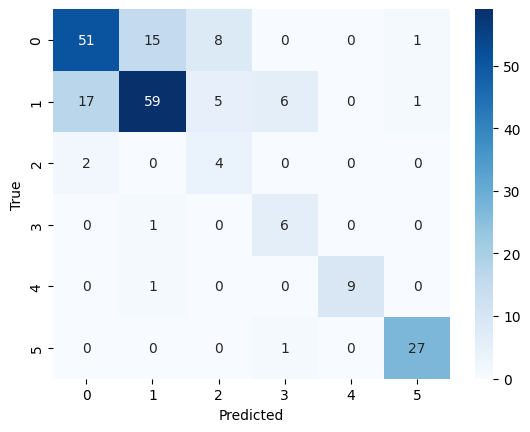

In [60]:
# report 및 confusion matrix, predict_proba

y_pred = lr.predict(glass_input_scaled)

print("report :\n", classification_report(y_pred, glass_target))
cm = confusion_matrix(y_pred, glass_target)
print (cm)

proba = lr.predict_proba(glass_input_scaled) 
for i in range (len(proba)) : 
    print (f"rate : {proba[i]} | real : {glass_target[i]}")

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### 3-4) DT (decision tree)

<img src="https://blog.kakaocdn.net/dn/M8NvT/btqFNsczW7S/7L7TecOCcE9YlFIMBSwKJ0/img.png" width="500px">

- 질문 (test)를 만들기 위한 학습을 진행하여, 각 class별로 효과적으로 분류하기 위한 모델이다.
- DT의 순서
    - (1) 이등분의 효과가 가장 큰 test (gini가 가장 높은 것)가 가장 먼저 배치됨 
        - 보통은 root node에 있는 test에 사용된 feature가 feature_importance가 가장 높은 경향이 있음
    - (2) test를 계속 만들어 가지치기를 하고, 최종적으로는 leaf node가 순수히 한 class만 남도록 학습 (value에서 확인 가능)
- DT의 장점
    - 시각적으로 매우 효과적으로 분류 이해 가능
    - scaling을 굳이 하지 않아도 됨 (normalization)
- DT의 단점
    - DecisionTreeRegressor에서, 범위가 넘어간 값을 회귀로 예측 불가능 (오직 train set으로 학습한 범위 내에서만 예측이 가능하게 됨)

최적의 max_depth, min_samples_split, max_features, min_samples_leaf를 찾기 위해 아래와 같이 scale을 설정하여 grid search를 진행한다. 여기서 grid search는 brute force 방식으로 모든 case를 조사한다고 생각하면 된다.

- max_depth : 2~10까지 range
- min_samples_split : 2~10까지 range
- max_features : 1~9까지 range (feature의 갯수까지)
- min_samples_leaf : 1~10까지 range

In [33]:
# grid search 

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth' : range(2, 11),
    'min_samples_split' : range(2, 11),
    'max_features' : range(1, 10),  
    'min_samples_leaf' : range(1, 11)
}

dt = DecisionTreeClassifier()

gs = GridSearchCV(dt, param_grid, cv=3, scoring='accuracy', n_jobs=-1) # cv 횟수 3

# fit
gs.fit(X_train_scaled, y_train)

print ("best parameter : ", gs.best_params_)
print ("validation score : ", np.max(gs.cv_results_['mean_test_score'])) # 최상의 교차 검증 점수
print ("best model : ", gs.best_estimator_) 

dt = gs.best_estimator_

print ('train score : ', dt.score(X_train_scaled, y_train))
print ('test score : ', dt.score(X_test_scaled, y_test))

best parameter :  {'max_depth': 7, 'max_features': 6, 'min_samples_leaf': 4, 'min_samples_split': 5}
validation score :  0.7426900584795323
best model :  DecisionTreeClassifier(max_depth=7, max_features=6, min_samples_leaf=4,
                       min_samples_split=5)
train score :  0.8421052631578947
test score :  0.7209302325581395


모든 조합을 visualization하기엔 엄청난 시간이 들기에 cross-validation test score 상위 20개만 시각화한다.

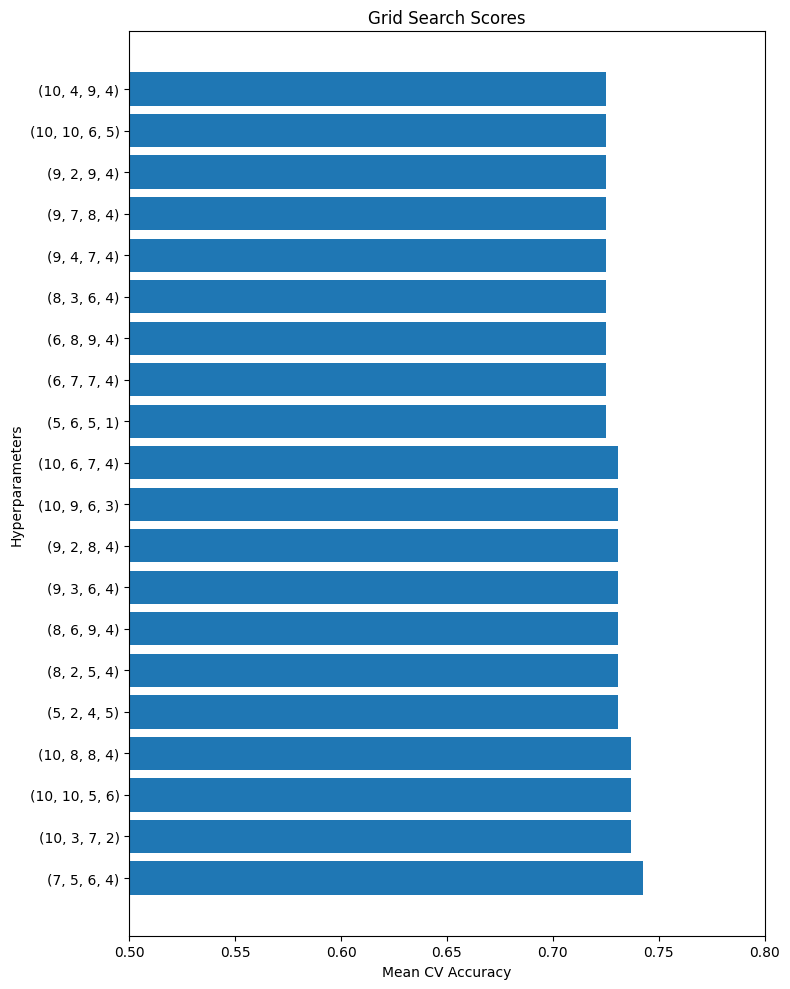

In [34]:
# 하이퍼파라미터 조합별 성능 시각화

# 각 하이퍼파라미터 조합별 교차 검증 스코어 가져오기
results = gs.cv_results_
mean_scores = results['mean_test_score']
params = results['params']

# 시각화를 위한 데이터 준비
depth_values = [params[i]['max_depth'] for i in range(len(params))]
split_values = [params[i]['min_samples_split'] for i in range(len(params))]
feature_values = [params[i]['max_features'] for i in range(len(params))]
leaf_values = [params[i]['min_samples_leaf'] for i in range(len(params))]

df_temp = pd.DataFrame({
    'max_depth' : depth_values,
    'min_samples_split' : split_values,
    'max_features' : feature_values,
    'min_samples_leaf' : leaf_values,
    'mean_test_score' : mean_scores
})

N = 20
df_topN = df_temp.nlargest(N, 'mean_test_score')

# 가로 방향으로 막대 그래프로 교차 검증 스코어 시각화
fig, ax = plt.subplots(figsize=(8, 10))
bars = ax.barh(range(N), 
               df_topN['mean_test_score'], 
               tick_label=[f"({d}, {s}, {f}, {l})" for d, s, f, l in zip(df_topN['max_depth'], 
                                                                         df_topN['min_samples_split'], 
                                                                         df_topN['max_features'], df_topN['min_samples_leaf'])])
ax.set_ylabel('Hyperparameters')
ax.set_xlabel('Mean CV Accuracy')
ax.set_title('Grid Search Scores')
plt.xlim([0.5, 0.8])  # x 축 범위 설정 (필요에 따라 조정 가능)
plt.tight_layout()
plt.show()

report :
               precision    recall  f1-score   support

           1       0.84      0.81      0.83        73
           2       0.86      0.81      0.83        80
           3       0.53      0.75      0.62        12
           5       0.85      0.85      0.85        13
           6       0.56      0.71      0.63         7
           7       0.90      0.90      0.90        29

    accuracy                           0.82       214
   macro avg       0.75      0.80      0.77       214
weighted avg       0.83      0.82      0.82       214

[[59  5  5  0  2  2]
 [10 65  3  1  1  0]
 [ 0  2  9  0  1  0]
 [ 0  2  0 11  0  0]
 [ 0  1  0  0  5  1]
 [ 1  1  0  1  0 26]]


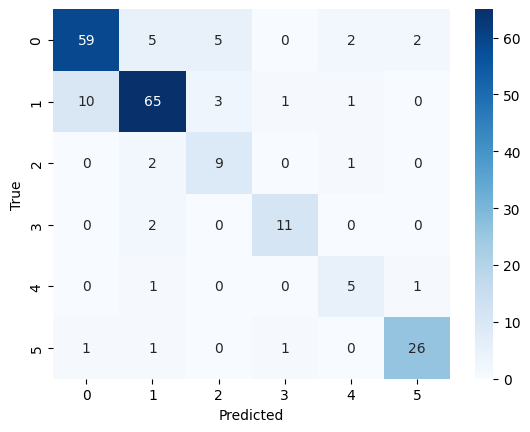

In [35]:
# report 및 confusion matrix

from sklearn.metrics import confusion_matrix, classification_report

y_pred = dt.predict(glass_input_scaled)

print("report :\n", classification_report(y_pred, glass_target))
cm = confusion_matrix(y_pred, glass_target)

print (cm)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### 3-5) RF (random forest)

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FZK4N6%2FbtqFNaJzPjg%2FsukopDLDuKSIymy2KWPAYk%2Fimg.png" width="500px">

- random으로 feature를 선정해 node로 지정 후 분기할 때마다 DT와 같은 방식으로 분기해 나가는 weaker learner를 만들어 비교 후, 다수결의 원칙에 따라 가장 많은 category로 예측   

- tree를 이용한 가장 확실하고 효과적인 방법, 일반적으로 decision tree보다 train score가 높다.

- 구성원리 
    - bootstrap sampling : 각각의 weaker learner를 만들기 위해 사용, feature을 복원 추출하고, 그 feature 안에서도 복원 추출하는 방법
    - 다음 분기를 고를 때에도 랜덤하게 뽑음
    - OOB 검증 : 확실히 "복원 추출" 이기 때문에 봅히지 않은 샘플도 생기니, 이를 OOB에 넣어 validation test를 진행 (재활용성을 높인다)
    
일전에 진행한 decision tree와 점수를 비교하여, 과연 RF가 DT보다 성능이 좋은지를 확인할 것이다.

In [61]:
# decision tree와 점수를 비교할 예정이다.

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(oob_score=True) # OOB validation test 진행
rf.fit (X_train_scaled, y_train)

print ('train score : ', rf.score(X_train_scaled , y_train))
print ('test score : ', rf.score(X_test_scaled , y_test))
print ('feature importance : ', rf.feature_importances_)

train score :  1.0
test score :  0.7674418604651163
feature importance :  [0.15051266 0.1047262  0.16522126 0.14851531 0.07557823 0.07814302
 0.13430702 0.09505675 0.04793956]


[[68  2  2  0  0  0]
 [ 1 72  0  0  1  1]
 [ 1  0 15  0  0  0]
 [ 0  2  0 13  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 28]]


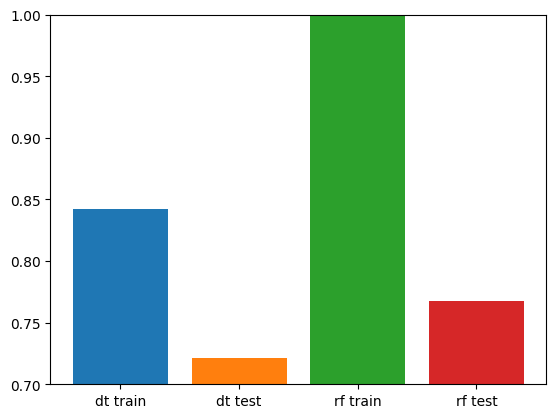

In [65]:
# confusion matrix 및 decision tree와 점수 비교 시각화

y_pred = rf.predict(glass_input_scaled)
cm = confusion_matrix(y_pred, glass_target)
print (cm)

plt.bar ('dt train', dt.score(X_train_scaled, y_train))
plt.bar ('dt test', dt.score(X_test_scaled, y_test))
plt.bar ('rf train', rf.score(X_train_scaled, y_train))
plt.bar ('rf test', rf.score(X_test_scaled , y_test))

plt.ylim((0.7, 1))

plt.show()

예상대로 random forest가 decision tree보다 train score가 더 높은 것을 확인 가능하다.

#### 3-6) K-means 

<img src="https://velog.velcdn.com/images/amzyoungchae/post/2a99b086-88b1-4d8f-9bb3-1da6e64af023/image.png" width="500px">

- https://velog.io/@jhlee508/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-K-%ED%8F%89%EA%B7%A0K-Means-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98
- k개의 클러스터 중심점을 거리를 기반으로 (유사도 기반) 이동하면서 clustering하는 비지도 학습 기법
- 순서
    - 임의의 k개의 클러스터 중심을 배치
    - 더 이상 변동이 없을 때까지 아래를 반복한다
        - 각 instance와 클러스터 중심 사이의 거리를 측정
        - 현재 instance에 가까운 중심의 class로 편입됨
        - class의 평균점이 새로운 클러스터 중심이 됨 (이동)

In [72]:
# K-means 알고리즘을 이용한 clustering

from sklearn.cluster import KMeans

km = KMeans(n_clusters=7, algorithm='auto') # 6개, [1, 2, 3, 4, 5, 6, 7], 4는 존재 x
km.fit (glass_input_scaled) # scaling된 input 넣어주기

print (km)
print (km.labels_)

KMeans(algorithm='auto', n_clusters=7)
[4 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 4 4 0 1 4 0 0 0 0 0 0 0 0 1 0 1 0 0 0 4
 0 4 4 0 0 0 4 1 0 1 4 4 0 4 1 0 0 0 1 1 0 0 0 0 4 4 4 4 4 1 1 1 4 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 4 4 6 6 6 3 3 6
 6 6 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 3 3 6 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0
 0 0 1 4 0 0 0 0 0 4 0 0 0 1 1 2 3 3 3 3 3 3 3 5 5 3 1 3 3 3 3 3 0 3 3 3 2
 0 2 4 4 4 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


In [73]:
# predict
# 실제 data를 그대로 넣어 얼마나 clustering을 잘 하였는지 비교

print (len(km.predict(glass_input_scaled)))

prediction = km.predict(glass_input_scaled)

cnt_success = 0 # clustering이 적절히 된 갯수
cnt_fail = 0 # clustering에 실패한 갯수

for i in range (len(glass_input_scaled)) : 
    print (f"[{i+1}] predict : {prediction[i]} | answer : {glass_target[i]}")
    
    if prediction[i] == glass_target[i] : 
        print ("success clustering")
        cnt_success += 1
        
    else : 
        print ("fail clustering")
        cnt_fail += 1
        
print ("success : ", cnt_success)
print ("fail : ", cnt_fail)

214
[1] predict : 4 | answer : 1
fail clustering
[2] predict : 0 | answer : 1
fail clustering
[3] predict : 0 | answer : 1
fail clustering
[4] predict : 0 | answer : 1
fail clustering
[5] predict : 0 | answer : 1
fail clustering
[6] predict : 1 | answer : 1
success clustering
[7] predict : 0 | answer : 1
fail clustering
[8] predict : 0 | answer : 1
fail clustering
[9] predict : 0 | answer : 1
fail clustering
[10] predict : 0 | answer : 1
fail clustering
[11] predict : 1 | answer : 1
success clustering
[12] predict : 0 | answer : 1
fail clustering
[13] predict : 1 | answer : 1
success clustering
[14] predict : 1 | answer : 1
success clustering
[15] predict : 0 | answer : 1
fail clustering
[16] predict : 0 | answer : 1
fail clustering
[17] predict : 0 | answer : 1
fail clustering
[18] predict : 4 | answer : 1
fail clustering
[19] predict : 4 | answer : 1
fail clustering
[20] predict : 0 | answer : 1
fail clustering
[21] predict : 1 | answer : 1
success clustering
[22] predict : 4 | answe

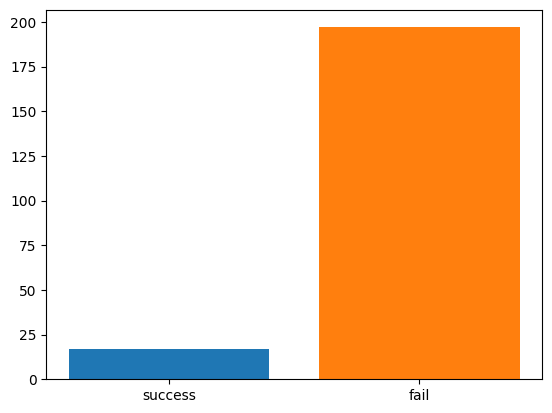

In [74]:
# 시각화

plt.bar ("success", cnt_success)
plt.bar ("fail", cnt_fail)
plt.show()

현재 성능이 **매우** 저조한 것을 확인 가능하다. 그에 따른 이유는 아래와 같다고 생각된다.

- 최적의 k가 아닐 수도 있다. target의 수가 7개기는 하지만, feature 사이의 영향력 및 상관계수에 따라서 각 feature들끼리의 convergence가 이루어졌을 수도 있다는 것.
- 데이터 복잡도가 높아 거리 측정 및 유사도 분석이 어려울 수도 있다. 

따라서 새로운 k를 찾기 위해 inertia를 구하여 시각화를 진행 후, elbow에 해당되는 k를 이용해 다시 학습 후 위 과정을 수행한다.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

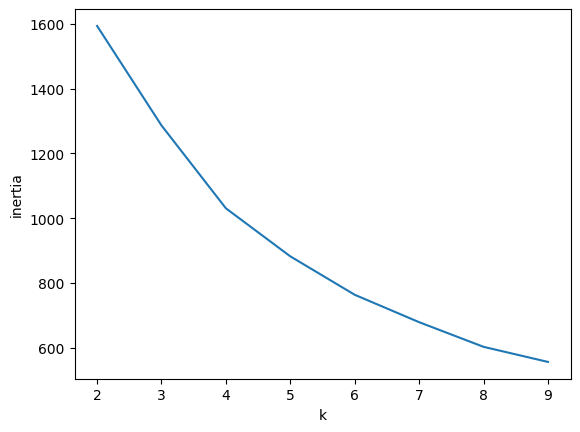

In [76]:
# inertia를 구해 시각화하여 elbow를 찾는다.

inertia = list()

for k in range(2, 10) :
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(glass_input_scaled)
  inertia.append(km.inertia_)

plt.plot(range (2, 10), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [78]:
# k = 4로 학습 재진행

km = KMeans(n_clusters=4, algorithm='auto') # elbow
km.fit (glass_input_scaled) # scaling된 input 넣어주기

print (km)
print (km.labels_)

KMeans(algorithm='auto', n_clusters=4)
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 2 2 3 3 3 2 3 3 3 2 2 3 2 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2
 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 2 3 3 3 3 3 2 3 3 3 3 2 0 3 2 2 2 3 2 2 1 1 2 2 2 3 3 3 3 0 0 0 2 0
 3 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
